<br>

<br>
<br>
<br>

<br>
<h1 ><big><center> Probabilistic Grahical Models</center></big></h1>



<h2><big><center> HOMEWORK 1 </center></big></h2>


<h3><big><center> Bastien Batardiere  </center></big></h3>

<h3><big><center> Omar Souaidi  </center></big></h3>

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from math import*
import numpy.linalg as LA 
from scipy.linalg import sqrtm 
import csv
import pyreadr
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame
import math

<big> 1- Linear Classification </big> 

For this exercice, wi first define all the functions we need at the beginning and we then answer to all the questions in the application part. 




1. Generative model (LDA)


1.a.

We first compute the Maximum Likelihood Estimator (MLE) for $\mu_0, \mu_1, \Sigma$. We have : 
$$L(\mu_0,\mu_1,\Sigma) = log(x_1,\ldots ,x_n,y_1, \ldots, y_n |\mu_0,\mu_1,\Sigma) = log(\prod_{i=1} ^n \mathcal N (x_i,\mu_{y_i},\Sigma)$$

We set $I_0 = \{ i, y_i = 0\}, \quad I_1 = \{ i, y_i = 1\}. $

$$ \begin{align*} L(\mu_0,\mu_1,\Sigma) &= \sum_{i \in I_0} -\frac 12 log(| \Sigma |) - \frac 12(x_i-\mu_0)^T\Sigma^{-1}(x_i- \mu_0) + \sum_{i \in I_1} -\frac 12 log(| \Sigma |) - \frac 12(x_i-\mu_1)^T\Sigma^{-1}(x_i- \mu_1) +C \\&   \end{align*}$$

Where $C$ is a constant that does not depend on the parameters. We consider $2L(\mu_0,\mu_1,\Sigma)$ to simplify.  

Let's derive with respect to $\mu_0$. 

$$\begin {align*} \frac {\partial L}{\partial \mu_0} &= \frac{\partial}{\partial \mu_0}(-\frac 12 \sum_{i \in I_0} (x_i-\mu_0)^T\Sigma^{-1}(x_i- \mu_0))\\ & = -\Sigma ^{-1}\sum_{i \in I_0} (x_i-\mu_0) \end{align*}  $$

Thus, $\Sigma$ being semi deifnite positive, we must have :  $$ \frac {\partial L}{\partial \mu_0} = 0 	\Leftrightarrow  \sum_{i \in I_0} x_i = I_0\mu_0 \Leftrightarrow \mu_0 = \frac{1}{I_0} \sum_{i \in I_0} x_i$$

Thus $\quad \hat{\mu_0} = \frac{1}{\sharp I_0} \sum_{i \in I_0} x_i$. Similarly, $\hat{\mu_1} = \frac{1}{\sharp I_1} \sum_{i \in I_1} x_i$. 

For $\Sigma$, we first need to compute the derivative over $\Sigma$.

First, note that $\frac{\partial log(det(X))}{\partial X } = X^{-1} $, for any $X$ invertible. 

Let $x \in \mathbb{R}^n$, we set $f(\Sigma) = \langle x, \Sigma ^{-1} x\rangle$

We set $\psi(A) =  \langle x, A x\rangle $, for $ A \in \mathcal{M}_{n,n}$, and $g(\Sigma) = \Sigma ^{-1}$, so that $f(\Sigma) = \psi(g(\Sigma))$

We know that $dg_{\Sigma}(H) = - \Sigma^{-1} H \Sigma^{-1} $, and $d\psi_A(H) = \langle x,Hx\rangle$, where $d$ is the differential operator. 

Applying the differential formula for composition functions, we get for $H \in \mathcal{M}_{n,n} $: 

$$\begin{align*} df_{\Sigma}(H) & = d\psi_{g(\Sigma)}(dg_{\Sigma}(H)) \\& =   d\psi_{g(\Sigma)}(- \Sigma^{-1} H \Sigma^{-1}) \\ & = -\langle x, \Sigma^{-1}H\Sigma^{-1}x \rangle \\ &= -\langle \Sigma^{-1}x,H \Sigma^{-1}x \rangle   \\ &=-\langle (\Sigma^{-1}x)(\Sigma^{-1}x)^T,H\rangle       \end{align*} $$


By identification , $\frac {\partial f}{\partial \Sigma}= -(\Sigma^{-1}x)(\Sigma^{-1}x)^T $ 


We can now compute $\frac {\partial L}{\partial \Sigma}$.

$ \begin{align*} \frac {\partial L}{\partial \Sigma} & = -n \Sigma ^{-1} + \sum_{i \in I_0} (\Sigma^{-1}(x_i-\mu_0))(\Sigma^{-1}(x_i-\mu_0))^T +  \sum_{i \in I_1} (\Sigma^{-1}(x_i-\mu_1))(\Sigma^{-1}(x_i-\mu_1))^T \\ & = -n\Sigma^{-1}+  \Sigma^{-1}\bigg( \sum_{i \in I_0} (x_i-\mu_0)(x_i-\mu_0)^T +  \sum_{i \in I_1} (x_i-\mu_1)(x_i-\mu_1)^T\bigg)\Sigma^{-1} \end{align*}$

Setting the derivative to zero and factorizing by $\Sigma^{-1}$, we get: 

$$ \begin{align*} \frac{\partial L}{\partial \Sigma}= 0  & \Leftrightarrow -nI_n + \bigg(\sum_{i \in I_0} (x_i-\mu_0)(x_i-\mu_0)^T +  \sum_{i \in I_1} (x_i-\mu_1)(x_i-\mu_1)^T\bigg)\Sigma^{-1} = 0 \\ & \Leftrightarrow  \Sigma = \frac{1}{n}\bigg(\sum_{i \in I_0} (x_i-\mu_0)(x_i-\mu_0)^T +  \sum_{i \in I_1} (x_i-\mu_1)(x_i-\mu_1)^T\bigg)\end{align*}$$

\\

\\

We now focus on the estimation of $\pi$. We can do this independantly of the firsts parameters. We write the log-likelihood. 

$$ L(y_1 \ldots y_n| \pi)= log(\prod_{i=1}^{n} \pi^{y_i}(1-\pi)^{1-y_i})= \sum_{i=1}^n y_ilog(\pi) +(1-y_i)log(1-\pi)=  \sharp I_1 log(\pi) +\sharp I_0log(1-\pi) $$

We take the derivative with respect to $\pi$ : 

$$\begin{align*} \frac{\partial L}{\partial \pi} &= \frac{\sharp I_1}{\pi}-\frac{\sharp I_0}{1-\pi}\\ & = \frac{\sharp I_1(1-\pi)-\sharp I_0 \pi}{\pi(1-\pi)}\\ &= \frac{\sharp I_1-n\pi}{\pi(1-\pi)} \end{align*}$$

We set the derivative to zero to get : $$ \frac{\partial L}{\partial \pi} = 0 \Leftrightarrow \sharp I_1 - n\pi = 0 \Leftrightarrow \hat\pi_{MLE}= \frac{\sharp I_1}{n} $$ 

1.b

Applying the Bayes Formula twice, we get : 

$$\begin{align*} p(y=1|x) &= \frac{p(y=1,x)}{p(x)} \\ &= \frac{p(y=1,x)}{p(x,y=1) +p(x,y=0) } \\ & = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)}  \\ &= \frac{\mathcal N (x,\mu_{1},\Sigma)\pi}{\mathcal N (x,\mu_{1},\Sigma)\pi+\mathcal N (x,\mu_{0},\Sigma)(1-\pi)} \\ & = \frac 1{1+\frac{(1-\pi)\mathcal N (x,\mu_{0},\Sigma)}{\pi\mathcal N (x,\mu_{1},\Sigma)}}  \\ &= \frac {1}{1+\frac{1-\pi}{\pi}exp(-(x-\mu_0)\Sigma^{-1}(x-\mu_0) +(x-\mu_1)\Sigma^{-1}(x-\mu_1))}             \end{align*}$$ 

We see that, if $\pi=1/2$, which is (relatively) the case here since our estimation $\hat{\pi} = 0.48$, we get back the same model as logistic regression.  












In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<big> Maximum Likelihood Estimation </big>

In [12]:
def MLE(X,Y): 
    n = Y.shape[0]
    card_I_1 = np.sum(Y) # number of points y =1
    card_I_0 = n-card_I_1 # number of points y =0
    X_0 =  np.multiply(X ,(Y==0).reshape(-1,1)) # X_0  is the vector X where we only kept the points such that y = 0
    X_1 =  np.multiply(X ,(Y==1).reshape(-1,1)) # X_1  is the vector X where we only kept the points such that y = 1
    mu_0_MLE = np.sum(X_0,axis = 0)/card_I_0 # MLE formula
    mu_1_MLE = np.sum(X_1,axis = 0)/card_I_1 # MLE formula
    X_0c = X_0 -np.multiply(mu_0_MLE, (Y==0).reshape(-1,1)) # we normalize to apply the formula
    X_1c = X_1 -np.multiply(mu_1_MLE,(Y==1).reshape(-1,1)) # we normalize
    sigma_0 = np.sum([np.outer(X_0c[i],X_0c[i]) for i in range (n) ],axis = 0) # MLE formula for the points y = 0
    sigma_1 = np.sum([np.outer(X_1c[i],X_1c[i]) for i in range (n) ],axis = 0) # MLE formula  for the points y = 1
    sigma_MLE = (sigma_0 +sigma_1)/(n) 
    pi_MLE = card_I_1 /n
    return pi_MLE,mu_0_MLE, mu_1_MLE, sigma_MLE
    

Logistic Regression algorithm

Here, $x$ stands for the vector in the data, and full_$x$ stands for the same vector with a column of 1 added to deal with the bias. 

In [44]:
# returns the sigmoid of x, we add an extra parameter before the exponential to simplify the calculus 
def sigmoid(x,lam=1):
    return 1 / (1 + lam*np.exp(-x))


#gradient of the cross_entropy function 
def grad_cross_entropy(x,y,w):
    arr_list = [x[i]*(sigmoid(w@x[i])-y[i]) for i in range(np.shape(x)[0])]
    return np.sum(np.array(arr_list),axis = 0)


def cross_entropy(x,y,w): 
    arr_list = [y[i]*np.log(sigmoid(w@x[i])) + (1-y[i])*np.log(1-sigmoid(w@x[i])) for i in range(np.shape(x)[0])]
    return -np.sum(np.array(arr_list))

#hessian of the cross entropy function
def hess_cross_entropy(x,y,w):
    mat_list = [np.outer(x[i],x[i])*sigmoid(w@x[i])*(1-sigmoid(w@x[i])) for i in range(np.shape(x)[0])]
    #print('mat_list :', mat_list)
    return np.sum(mat_list,axis=0)

# gradient descent to optimize
# here full_x is x concatenate with 1 to deal with the bias
def Logistic_Regression(full_x,y,nbIter,eps = 1e-3):
    w = 0.01*np.random.randn(3)
    step = 0.01
    for i in range (nbIter) : 
        grad = grad_cross_entropy(full_x,y,w) # compute the gradient 
        criterion = np.linalg.norm(grad)/np.linalg.norm(w) # criterion to stop the algorithm
        if criterion < eps :
            return w 
        w = w-step*grad  # update w by a gradient descent 
    return w

<big> Linear Regression function </big> 

In [39]:
# we just apply the formula in the slides. Note that X is very likely to be full rank
# since the data is random, so that the Pseudo inverse is well defined.
def LinearRegression(full_x,y): 
    inv = np.linalg.inv(full_x.T@full_x)
    beta = inv@full_x.T@y
    return beta

We first define some functions to make the code clearer. 


In [40]:
# function to import the data 
def import_data(path): 
    fichier = csv.reader(open(path, "r"), delimiter=' ')
    length = len(list(fichier))
    X = np.zeros((length, 2))
    Y = np.zeros(length)
    fichier= csv.reader(open(path, "r"), delimiter=' ')
    for i,ligne in enumerate(fichier) :
        X[i,0] = ligne[0]
        X[i,1] = ligne[1]
        Y[i] = ligne[2]
    return X,Y 
    
# plot the data 
def plot_data(ax,X,Y,title):
    x = [GM[0] for GM in X]
    y = [GM[1] for GM in X]
    value = (Y>0)
    ax.scatter(x,y,c=value)
    ax.set_title(title)

In [41]:


# compute the probability function of y given x
def p_y_given_x(x, mu_0,mu_1,sigma, prob_pi): 
   inv = np.linalg.inv(sigma)
   temp = (x-mu_0)@inv@(x-mu_0) - (x-mu_1)@inv@(x-mu_1)
   estim  = sigmoid(temp,(1-prob_pi)/prob_pi)
   return estim

#decides according to beta the classification of each point x in full_X
def prediction_Regression(beta,full_X):
    pred = [beta@x>0.5 for x in full_X]
    return np.array(pred)


def misclassification_error(estim, Y): 
  error = 0
  for i,y in enumerate(Y): 
    error += (estim[i]-y)!=0
  error /= len(Y)
  return np.round(100*error,3) 

#Compute for each point in X, what is the most likely value for the corresponding y, for the MLE 
def prediction_MLE(X, mu_0,mu_1,sigma, prob_pi):
  X = np.array([p_y_given_x(x, mu_0,mu_1,sigma, prob_pi)>0.5 for x in X])
  return X

<big> Application and parameters learnt  </big>




################# data A ################ 




 
 ###Generative model###
 
 Parameters learnt : 
 pi = 0.48 
 mu_0 = [10.73248858 10.93983367] 
 mu_1 =[11.03264581  5.99294053]  
 Sigma = [[0.58821974 0.13912842]
 [0.13912842 0.81959919]]


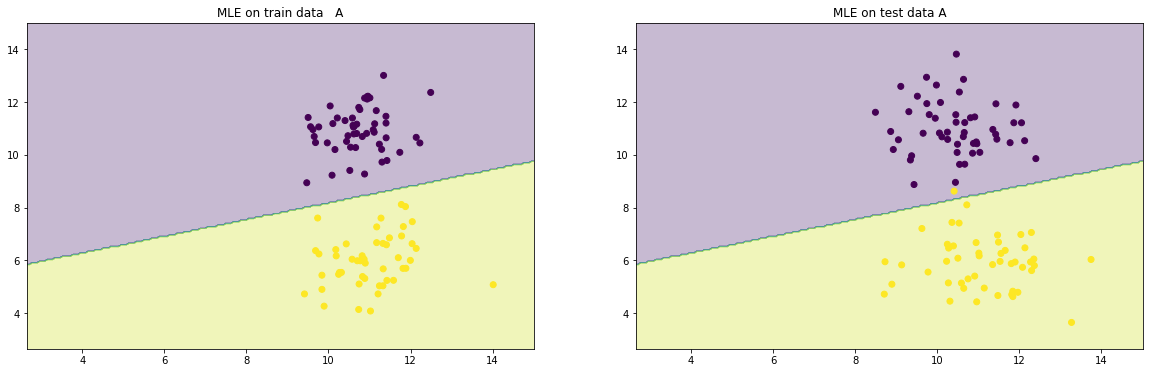

Misclassification error for train data A : 0.0 %
Misclassification error for test data A : 1.0 %


####Logistic Regression###
 
parameters learnt : 
 w = [ 4.29206665 -5.40237663] 
 b = 0.5229669726401334


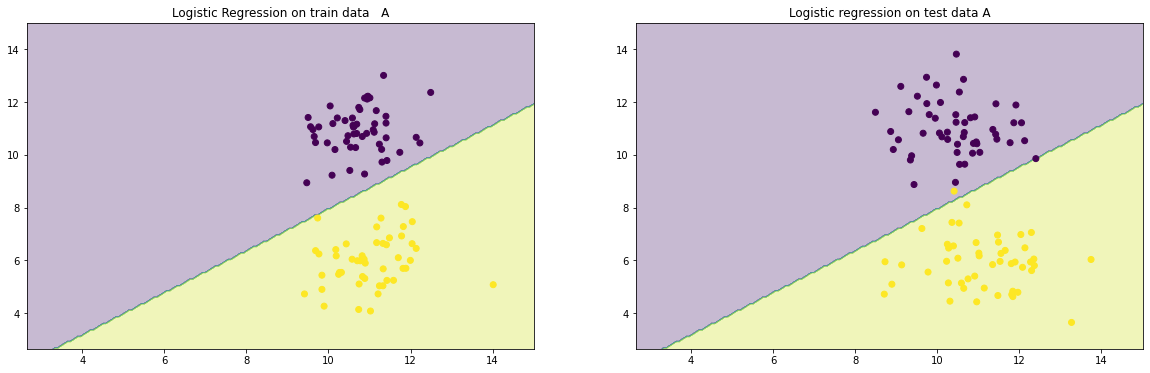

Misclassification error for train data A : 0.0 %
Misclassification error for test data A : 1.0 %


####Linear Regression###
 
parameters learnt : 
 w = [ 0.05582438 -0.17636636] 
 b = 1.3834577395037786


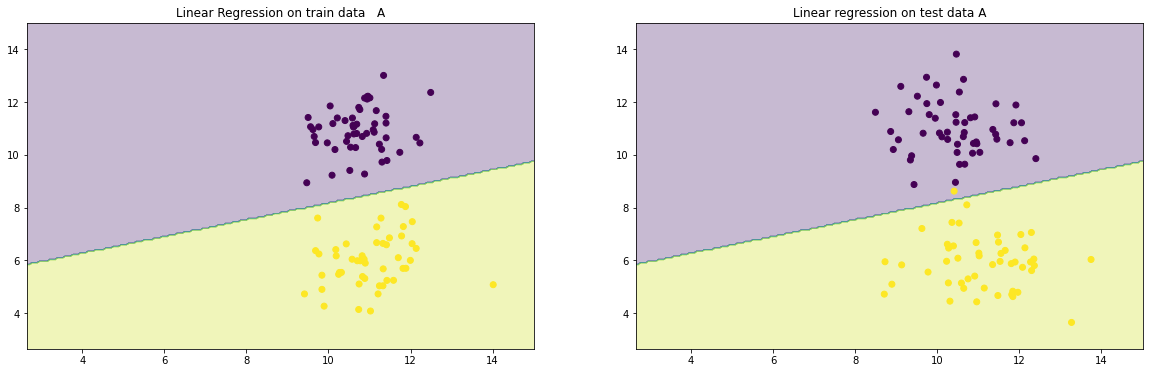

Misclassification error for train data : A : 0.0 %
Misclassification error for test data : A : 1.0 %



################# data B ################ 




 
 ###Generative model###
 
 Parameters learnt : 
 pi = 0.55 
 mu_0 = [10.58256756 11.17169818] 
 mu_1 =[11.24757662  6.095283  ]  
 Sigma = [[1.64391088 0.70139847]
 [0.70139847 2.0605845 ]]


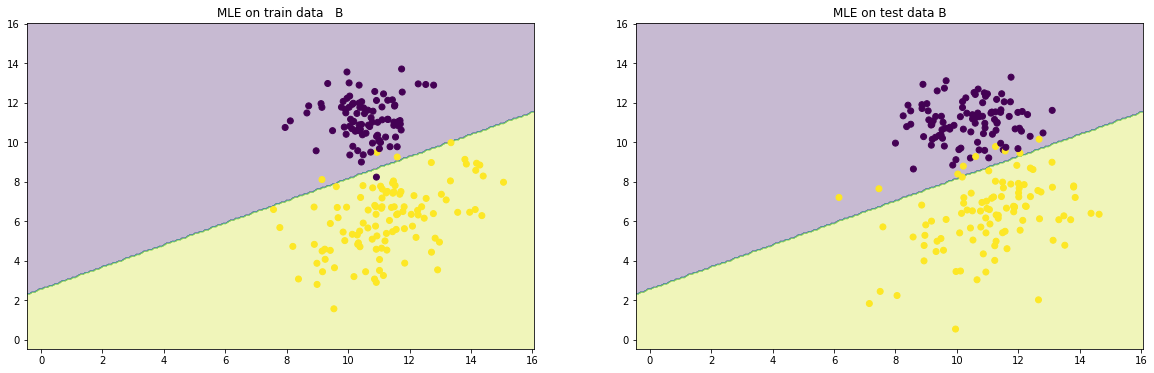

Misclassification error for train data B : 2.0 %
Misclassification error for test data B : 4.5 %


####Logistic Regression###
 
parameters learnt : 
 w = [ 14.29259794 -17.07914229] 
 b = 3.2292024224467406


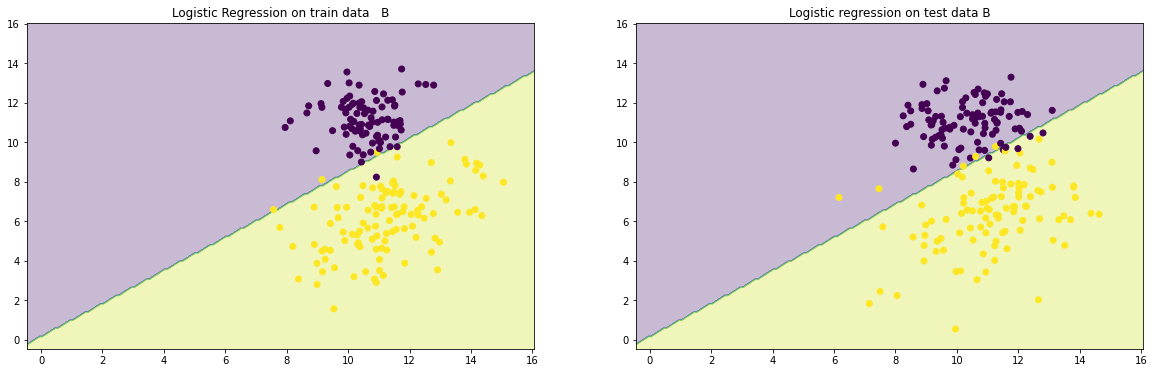

Misclassification error for train data B : 2.5 %
Misclassification error for test data B : 5.5 %


####Linear Regression###
 
parameters learnt : 
 w = [ 0.08258172 -0.14757517] 
 b = 0.8824998417113353


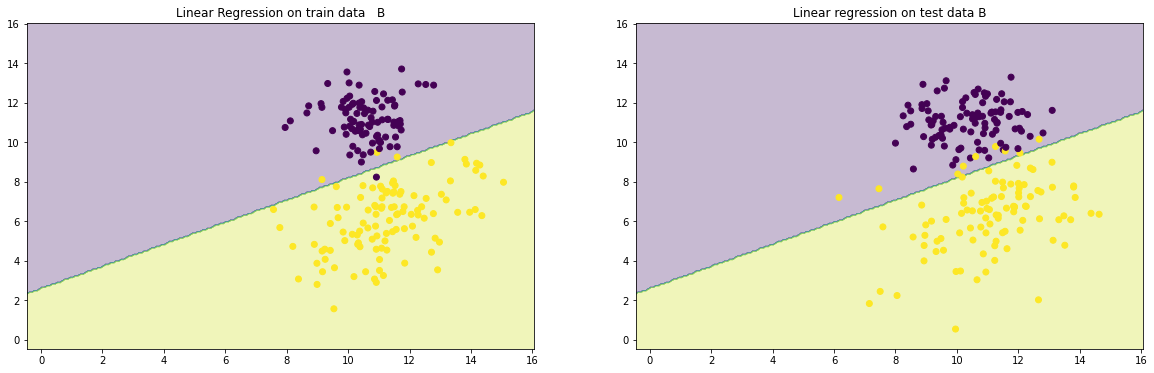

Misclassification error for train data : B : 2.0 %
Misclassification error for test data : B : 4.5 %



################# data C ################ 




 
 ###Generative model###
 
 Parameters learnt : 
 pi = 0.4166666666666667 
 mu_0 = [10.6192273  10.83868653] 
 mu_1 =[11.18463199  6.04249315]  
 Sigma = [[ 1.27823018 -0.06243809]
 [-0.06243809  1.66584186]]


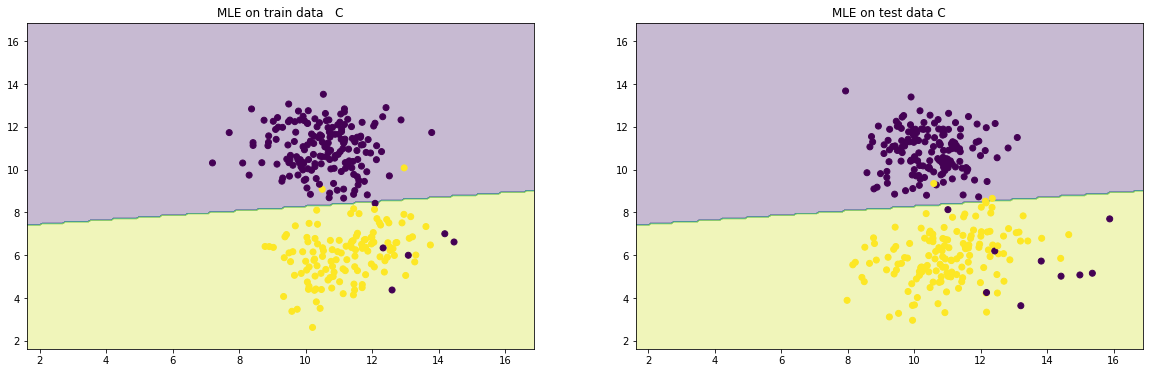

Misclassification error for train data C : 2.667 %
Misclassification error for test data C : 4.0 %


####Logistic Regression###
 
parameters learnt : 
 w = [ 10.51368803 -15.34743647] 
 b = 7.012927380983167


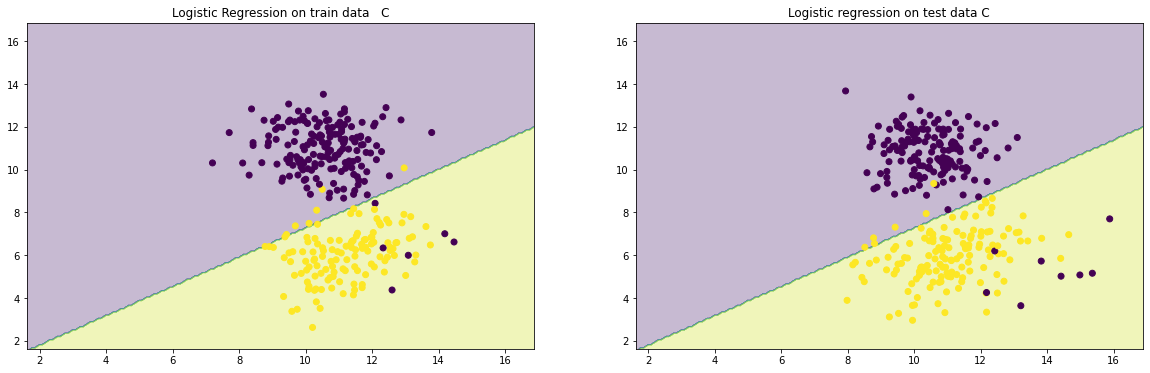

Misclassification error for train data C : 4.333 %
Misclassification error for test data C : 4.667 %


####Linear Regression###
 
parameters learnt : 
 w = [ 0.01675461 -0.15897174] 
 b = 1.6401520597430483


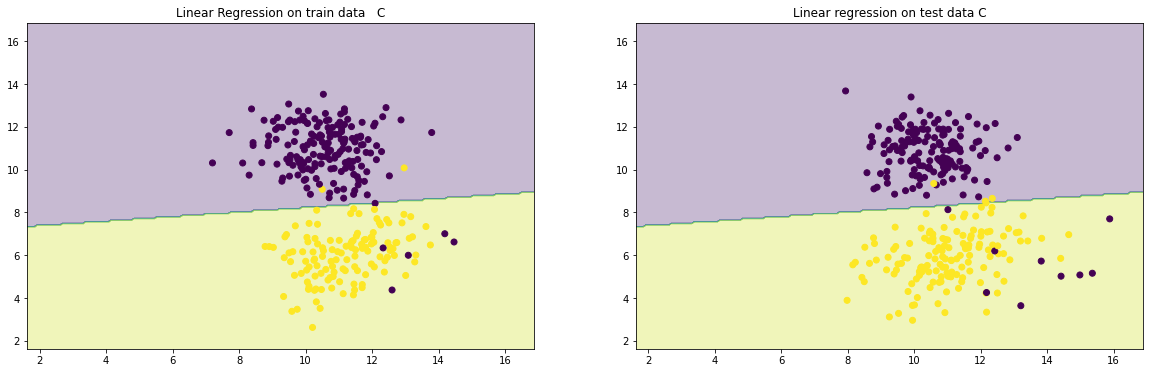

Misclassification error for train data : C : 2.667 %
Misclassification error for test data : C : 4.0 %


In [116]:
# initializing some lists to get the error for interpretation 
list_train_error = []
list_test_error = []

# we go trough each sample of data 
for letter in ['A','B','C']: 
  print('\n\n\n################# data {} ################ \n\n\n'.format(letter))
  # load train and test data 
  X_train,Y_train = import_data("/content/drive/MyDrive/data/data/train"+letter)
  X_test,Y_test = import_data("/content/drive/MyDrive/data/data/test"+letter)

  # add a column of 1 to deal with the bias for the regression 
  ones_train = np.full(np.shape(X_train)[0],1) .reshape(-1,1) # a vector full of 1 for training data 
  full_X_train = np.concatenate((X_train,ones_train),axis = 1) # set an extra column 1 to deal with the bias
  ones_test = np.full(np.shape(X_test)[0],1) .reshape(-1,1) # same with the test set
  full_X_test = np.concatenate((X_test,ones_test),axis = 1)


  # set the window to visualize the data 
  minimum = np.min(np.array([X_test,X_train]))-1
  maximum = np.max(np.array([X_train,X_test]))+1
  scale = 200
  xx,yy = np.meshgrid(np.linspace(minimum,maximum,scale),np.linspace(minimum,maximum,scale))

  print('\n \n ###Generative model###\n ')

  # compute the MLE 
  proba,mu_0,mu_1,sigma = MLE(X_train,Y_train)

  print(' Parameters learnt : \n pi = {} \n mu_0 = {} \n mu_1 ={}  \n Sigma = {}'.format(proba,mu_0,mu_1,sigma))

  fig = plt.figure(figsize=(20,6))
  ax1 = plt.subplot(1,2,1) 
  ax2 = plt.subplot(1,2,2)

  # compute the line defined by p(y=1|x)=0.5, i.e. the decision boundary 
  grid = np.zeros((scale,scale))
  for i in range(scale):
    for j in range(scale):
        point = np.array([xx[i,j],yy[i,j]])
        grid[i,j] = p_y_given_x(point, mu_0,mu_1,sigma, proba)>0.5
  # plot the decision boundary 
  ax1.contourf(xx,yy,grid, alpha = 0.3)
  ax2.contourf(xx,yy,grid,alpha =0.3)

  # compute the misclassification error for train and test data 
  train_error = str(misclassification_error(prediction_MLE(X_train,mu_0,mu_1,sigma, proba), Y_train))
  list_train_error.append(train_error)
  test_error = str(misclassification_error(prediction_MLE(X_test,mu_0,mu_1,sigma, proba), Y_test))
  list_test_error.append(test_error)
  title_train = 'MLE on train data   '+ letter 
  title_test = 'MLE on test data ' + letter 

  #plot the data clouds in R^2
  plot_data(ax1,X_train,Y_train,title_train)
  plot_data(ax2,X_test,Y_test,title_test)
  plt.show()
  
  print('Misclassification error for train data {} :'.format(letter), train_error ,str('%') )
  print('Misclassification error for test data {} :'.format(letter), test_error, str('%') )


  print('\n\n####Logistic Regression###\n ')
  nbIter = 500 # number of iterations for optimisation algorithm 

  # compute the parameter w 
  w_star = Logistic_Regression(full_X_train,Y_train,nbIter,eps = 1e-3)
  print('parameters learnt : \n w = {} \n b = {}'.format(w_star[0:2],w_star[2]))

  # compute the line defined by p(y=1|x)=0.5, i.e. the decision boundary
  grid = np.zeros((scale,scale))
  for i in range(scale):
    for j in range(scale):
        point = np.array([xx[i,j],yy[i,j],1])
        grid[i,j] =point@w_star>0.5

  #plot the decision boundary, i.e. the line defined by the equation p(y|x)=0.5 
  fig = plt.figure(figsize=(20,6))
  ax1 = plt.subplot(1,2,1) 
  ax2 = plt.subplot(1,2,2)
  ax1.contourf(xx,yy,grid, alpha = 0.3)
  ax2.contourf(xx,yy,grid, alpha = 0.3)

  # compute the misclassification error for train and test data 
  train_error = str(misclassification_error(prediction_Regression(w_star,full_X_train), Y_train))
  list_train_error.append(train_error)
  test_error = str(misclassification_error(prediction_Regression(w_star,full_X_test), Y_test))
  list_test_error.append(test_error)
  
  title_train = 'Logistic Regression on train data   '+ letter 
  title_test = 'Logistic regression on test data ' + letter 

  #plot the data clouds 
  plot_data(ax1,X_train,Y_train,title_train)
  plot_data(ax2,X_test,Y_test, title_test)
  plt.show()
  print('Misclassification error for train data {} :'.format(letter), train_error,str('%')  )
  print('Misclassification error for test data {} :'.format(letter), test_error,str('%') )

  print('\n\n####Linear Regression###\n ')

  # computing the MLE for Linear regression with the formula in the slides 
  beta = LinearRegression(full_X_train,Y_train)
  print('parameters learnt : \n w = {} \n b = {}'.format(beta[0:2],beta[2]))

  grid = np.zeros((scale,scale))
  for i in range(scale):
    for j in range(scale):
        point = np.array([xx[i,j],yy[i,j],1])
        grid[i,j] =point@beta>0.5

  fig = plt.figure(figsize=(20,6))
  ax1 = plt.subplot(1,2,1) 
  ax2 = plt.subplot(1,2,2)
  # we plot the decision boundary, i.e. the line defined by the equation p(y|x)=0.5  
  ax1.contourf(xx,yy,grid, alpha = 0.3)
  ax2.contourf(xx,yy,grid, alpha = 0.3)

  # compute the misclassification error for train and test data 
  train_error = str(misclassification_error(prediction_Regression(beta,full_X_train), Y_train))
  list_train_error.append(train_error)
  test_error = str(misclassification_error(prediction_Regression(beta,full_X_test), Y_test))
  list_test_error.append(test_error)
  title_train = 'Linear Regression on train data   '+ letter 
  title_test = 'Linear regression on test data ' + letter 

  # plot the data clouds
  plot_data(ax1,X_train,Y_train,title_train)
  plot_data(ax2,X_test,Y_test, title_test)
  plt.show()
  print('Misclassification error for train data : {} :'.format(letter), train_error,str('%') )
  print('Misclassification error for test data : {} :'.format(letter), test_error, str('%') )

<big> Comparison of performances/ Interpretation </big>

In [ ]:
list_train_error = np.array(list_train_error).reshape((3,3))
list_test_error = np.array(list_test_error).reshape((3,3))

df_train = DataFrame({'A':list_train_error[0],'B':list_train_error[1],'C':list_train_error[2]}, index =['MLE','Logistic Regression','Linear Regression'])
df_test = DataFrame({'A':list_test_error[0],'B':list_test_error[1],'C':list_test_error[2]}, index =['MLE','Logistic Regression','Linear Regression'])
print('Train error :\n',df_train) 
print(' \nTest_error :\n ', df_test)

Train error :
                        A    B      C
MLE                  0.0  2.0  2.667
Logistic Regression  0.0  2.5  4.333
Linear Regression    0.0  2.0  2.667
 
Test_error :
                         A    B      C
MLE                  1.0  4.5    4.0
Logistic Regression  2.0  5.5  4.667
Linear Regression    1.0  4.5    4.0


The misclassification error is larger for the test data. Indeed, since we trained on it, the model tries to be the best on the ttrain data. Moreover, we did not use any regularization function to avoid overfitting or ensure the robustness of the model . 

We see that the data B is a little bit harder to classify. Indeed, the two clusters overlap so we have a bigger classification error on this dataset. 

Generative model supposes the data to be distributed as Gaussian, which is not necessarily the case, especially on the dataset C. Indeed, some points are away from the center, in both the train and test set. 

We have very similar results for LDA and Linear regression.  We have better results with those methods than Logistic Regression method.  Logistic Regression does not assume any distribution on the data.Thus it is more sensitive to error in the data, than LDA or Linear Regression.  

# Part 2 : GMM 

We have :

$$X|(Z=k) ∼  \mathcal{N}(\mu_k,\Sigma_k) \text{ and } Z ∼ \text{Multinom}(\pi_1,\pi_2,...,\pi_K)$$


**For a multivariate GMM, let's prove the E-step and M-step**

- **The E-step is:**


  $\forall k, i \text{ } \text{ } \text{ } \mathbb{P}(Z=k|X_i = x_i)$ at iteration $t$

  $\mathbb{P}(Z=k|X_i = x_i) = \frac{\pi_k^{(t)} f_k^{(t)}(x_i)}{\overset{K}{\underset{l=1}{\sum}} \pi_l^{(t)} f_l^{(t)}(x_i)}$

  with $f_l^{(t)}(x_i) = \frac{1}{\bigg(\sqrt{2\pi|\Sigma_l^{(t)}|^{\frac{1}{p}}}\bigg)^p} \times \exp \bigg( -\frac{1}{2} (x_i - \mu_l^{(t)})^T \big( \Sigma_l^{(t)} \big)^{-1} (x_i - \mu_l^{(t)})\bigg)$

- **The M-step is:**

  $\theta^{(t+1)} = \underset{\theta}{\text{argmax }} \mathbb{E}_{\theta^{(t)}} \Big[ \log \Big( f\big( X, Z | \theta \big) \Big) \Big] $


 \begin{align*}
  \mathbb{E}_{\theta^{(t)}} \Big[ \log \Big( f\big( X, Z | \theta \big) \Big) \Big] & = \mathbb{E}_{\theta^{(t)}} \Big[ \overset{n}{\underset{i=1}{\sum}} \Big( \log(\pi_{z_i}) + \log \big( f_{\mu_{z_i}, \Sigma_{z_i}} (x_i)\big)\Big) \Big]\\
  & = \overset{K}{\underset{k=1}{\sum}} \overset{n}{\underset{i=1}{\sum}} \bigg[ \log(\pi_k) + \log \Big( f_{\mu_k, \Sigma_k}(x_i)\Big) \bigg] . \mathbb{P}_{\theta^{(t)}} \Big( Z=k | X=x_i\Big)\\
  & = \overset{K}{\underset{k=1}{\sum}} \overset{n}{\underset{i=1}{\sum}} \bigg[ -\frac{1}{2}\log|\Sigma_k| -\frac{1}{2} (x_i - \mu_k)^T \big( \Sigma_k \big)^{-1} (x_i - \mu_k) + \log(\pi_k) \bigg] . f_k^{(t)} (x_i)\\
  & =: Q(\theta , \theta^{(t)})
  \end{align*}

  ## Gradient with respect to $ \Sigma_k $
  
  - The gradient with respect to $ \Sigma_k $ for every $k \in[\![1,K]\!]$ is given by :

    $$\nabla_{\Sigma_k} Q(\theta , \theta^{(t)}) = \overset{n}{\underset{i=1}{\sum}} \bigg[ -\frac{1}{2} \nabla_{\Sigma_k} \log|\Sigma_k| -\frac{1}{2} \nabla_{\Sigma_k} (x_i - \mu_k)^T \big( \Sigma_k \big)^{-1} (x_i - \mu_k) \bigg] f_k^{(t)} (x_i) $$

    We know that  $\nabla \log \Big( \det(X) \Big) = \Big( X^{-1} \Big)^T$

    And that :

    \begin{align*}
    (x_i - \mu_k)^T \big( \Sigma_k \big)^{-1} (x_i - \mu_k) & = \text{Tr} \Big( (x_i - \mu_k)^T \big( \Sigma_k \big)^{-1} (x_i - \mu_k) \Big) \\
    & = \text{Tr} \Big( \big( \Sigma_k \big)^{-1} (x_i - \mu_k) (x_i - \mu_k)^T \Big)
    \end{align*}

    and we have also this identity :

    $\nabla \text{Tr} \Big( X^{-1} B \Big) = - \Big( X^{-1} \Big)^T B^T \Big( X^{-1} \Big)^T$

    Therefore we can type that, 

    $$\nabla_{\Sigma_k} Q(\theta , \theta^{(t)}) = \frac{1}{2} \Big[-f_k^{(t)}.\big( \Sigma_k^{-1} \big)^{T} + \big( \Sigma_k^{-1} \big)^{T} S^T \big( \Sigma_k^{-1} \big)^{T}  \Big]$$

    where $f_k^{(t)} = \overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) $ and $S = \overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) (x_i - \mu_k) (x_i - \mu_k)^T $

    Therefore, 
    
    $\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\nabla_{\Sigma_k} Q(\theta , \theta^{(t)}) = 0 $

    $\iff -f_k^{(t)}.\big( \Sigma_k^{-1} \big)^{T} + \big( \Sigma_k^{-1} \big)^{T} S^T \big( \Sigma_k^{-1} \big)^{T} = 0 $

    $\iff \Sigma_k = \frac{1}{f_k^{(t)}} S $

    $ \iff \boxed{\Sigma_k = \frac{\overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) (x_i - \mu_k) (x_i - \mu_k)^T }{\overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) } }$
    
  ## Gradient with respect to $\mu_k$

  - Now, let's calculate the gradient with respect to $\mu_k$ for $k \in[\![1,K]\!]$ :

    \begin{align*}
    \nabla_{\mu_k} Q(\theta, \theta^{(t)}) & = - \overset{n}{\underset{i=1}{\sum}} \frac{1}{2} \nabla_{\mu_k}\bigg( (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \bigg) f_k^{(t)} (x_i)\\
    & = - \overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) \Sigma_k^{-1} (x_i - \mu_k)
    \end{align*}

    Therefore, 

    $\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\nabla_{\mu_k} Q(\theta, \theta^{(t)}) = 0$

    $ \iff \overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) \Sigma_k^{-1} (x_i - \mu_k) = 0$

    $\iff \overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) (x_i - \mu_k) = 0$

    $\iff \boxed{ \mu_k = \frac{\overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) x_i}{\overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i)} } $
    
   ## Gradient with respect to $\pi_k$

  - Now, let's calculate the gradient with respect to $\pi_k$ for $k \in[\![1,K]\!]$ :

    $ \nabla_{\pi_k} Q(\theta, \theta^{(t)}) = \overset{n}{\underset{i=1}{\sum}} \Big( \pi_k^{-1} f_k^{(t)} (x_i) - 1 \Big)$

    Therefore, 

    $\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\text{ }\nabla_{\pi_k} Q(\theta, \theta^{(t)}) = 0$

    $ \iff \boxed{ \pi_k = \frac{1}{n} \overset{n}{\underset{i=1}{\sum}} f_k^{(t)} (x_i) } $
    
    Which finish the proof.


In [2]:
class GMM():
    def __init__(self, k, max_iter=100, eps=1e-5):
        from scipy.stats import multivariate_normal
        self.var_ = multivariate_normal
        self.n_components_ = k
        self.mu_ = None
        self.pi_ = None
        self.sigma_ = None
        self.cond_prob_ = None
        self.labels_ = None
        self.max_iter_ = max_iter
        self.eps_ = eps

    def fit(self, X):   
        reg_mat = 1e-4 * np.eye(len(X[0]))  
        K_ = self.n_components_
        n, p = X.shape
        kmeans = KMeans(n_clusters=K_).fit(X)
        pi = [(kmeans.labels_== k).sum() / n for k in range(K_)]
        mu = kmeans.cluster_centers_
        sigma =  [reg_mat + np.sum(np.array([(x[:,None]-mu[k][:,None]) @ (x[None,:]-mu[k][None,:]) for x in X[kmeans.labels_==k]]), axis=0) / (kmeans.labels_==k).sum() for k in range(K_)]
        # EM algorithm
        LogLikelihood_1, LogLikelihood_2 = None, self.log_likelihood(X, mu, sigma, pi)
        convergence = False; iteration = 0
        while (not convergence) and iteration <= self.max_iter_:
            iteration += 1
            # E-STEP
            w = np.array([pi[k] * self.var_.pdf(X, mean=mu[k], cov=sigma[k]) for k in range(K_)]).T
            w = w / np.sum(w, axis=1).reshape(-1, 1)
            # M-STEP
            pi = np.sum(w, axis=0) / n
            for k in range(K_):
                mu[k] = np.sum(w[:, k][:,None] * X, axis=0) / (n*pi[k])
                sigma[k] = reg_mat + np.sum(np.array([w[i, k] * (X[[i]].T-mu[k][:,None]) @ (X[[i]]-mu[k][None,:]) for i in range(n)]), axis=0) / (n*pi[k])
            LogLikelihood_1, LogLikelihood_2 = LogLikelihood_2, self.log_likelihood(X, mu, sigma, pi)
            convergence = abs(LogLikelihood_1 - LogLikelihood_2) < self.eps_
            
        self.mu_ = np.array(mu)
        self.sigma_ = np.array(sigma)
        self.pi_ = pi
        self.cond_prob_ = w
        self.labels_ = w.argmax(axis=1)
        
        return self
        
    def predict(self, X):
        w = self.predict_proba(X)
        return w.argmax(axis=1)
        
    def predict_proba(self, X):
        mu = self.mu_; sigma = self.sigma_; pi = self.pi_; K_ = self.n_components_
        w = np.array([pi[k] * self.var_.pdf(X, mean=mu[k], cov=sigma[k]) for k in range(K_)]).T
        w = w / np.sum(w, axis=1).reshape(-1, 1)
        return w
    
    @staticmethod
    def log_likelihood(X, mu, sigma, pi):
        y = np.array([pi[k] * self.var_.pdf(X, mean=mu[k], cov=sigma[k]) for k in range(K_)]).T
        return np.sum(np.log(np.sum(y, axis=1)))

In [ ]:
!pip install pyreadr
import pyreadr
decathlon = pyreadr.read_r('./data/decathlon.RData') ## A MODIFIER EN METTANT LE LIEN VERS LE FICHIER
data = pd.DataFrame(decathlon['X']).values
n_clusters = 3
gmm = GMM(n_clusters).fit(data)
_gmm_labels = gmm.labels_

In [ ]:
from sklearn.decomposition import PCA ## For visualisation as there are more than 2 dimensions 

pca = PCA(2) ## Two components since we want to plot on y-x axis
data_pca = pca.fit_transform(data)

n_clusters = 3

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=_gmm_labels,linewidth=3)
plt.title('Projection in 2D with GMM given labels')

Interpretation

We can see on the plot the 3 clusters. However, we do not know what these clusters represents. We could do a more advanced analysis if we were comparing the points in their real space (not only the PCA) to their clusters. 